# Cancer Classifier

In [10]:
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()

Lets take a look at the data:

In [11]:
print(breast_cancer_data.feature_names)
print(breast_cancer_data.data[0])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


Lets see what we are trying to classify:

In [12]:
print(breast_cancer_data.target)
print(breast_cancer_data.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

We see 0 corresponds with malignant, and 1 with benign.

Now we will split the data into training and test sets:

In [13]:
from sklearn.model_selection import train_test_split

training_data, validation_data, training_labels, validation_labels = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size=0.2, random_state=100)

Lets check this worked:

In [7]:
print(len(training_data))
print(len(training_labels))

455
455


Next we create a K neighbors classifier:

In [16]:
from sklearn.neighbors import KNeighborsClassifier 

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(training_data, training_labels)

KNeighborsClassifier(n_neighbors=3)

Now we can check how accurate the classifier is:

In [17]:
print(classifier.score(validation_data, validation_labels))

0.9473684210526315


This classifier turned out well with k = 3. But we can check if there is a better k. Lets try values between 1 and 100:

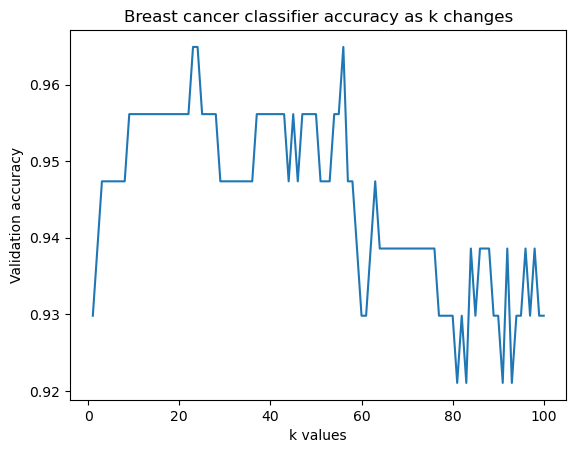

In [21]:
import matplotlib.pyplot as plt

k_list = range(1, 101)
accuracies = []

for i in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(training_data, training_labels)
    accuracies.append(classifier.score(validation_data, validation_labels))

plt.plot(k_list, accuracies)
plt.xlabel("k values") 
plt.ylabel("Validation accuracy")
plt.title("Breast cancer classifier accuracy as k changes")
plt.show()

As expected, the accuracy increases then decreases as k increases. Now we can choose a best value for k:

In [24]:
best_accuracy = max(accuracies)
best_k = k_list[accuracies.index(best_accuracy)]

print("Best k:", best_k)
print("Best validation accuracy:", best_accuracy)

Best k: 23
Best validation accuracy: 0.9649122807017544


## Conclusion

A K-Nearest neighbors classifier was trained to classify breast tumors as malignant or benign. The best value for k turned out to be 23 with a validation accuracy of 96.5%.